Creates HAADF-STEM like atomic images. Creates a datapoint array, gaussians applied at each datapoint, and this configuration can be sampled at arbirary positions. Allows for adding noise to gausian parameters, datapoint locations, scan locations, shot noise, and baseline gaussian noise.

Designed for use with non-uniform gaussians and/or non-grid scanning (otherwise a convolution is simpler)

This is a Demo for using the Dataset Generator provided in ctntools git repository 'https://github.com/ctnelson/ctntools.git'
Created 2024 by Dr. Christopher Nelson
Oak Ridge National Laboratory

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from git import Repo,  InvalidGitRepositoryError

Custom GIT Imports

In [2]:
gitlocal = ''
for i in sys.path:
    temp=i.split('\\')
    if temp[-1]=='site-packages':
        gitlocal=i

In [3]:
#Set local git repository location
gitremote = 'https://github.com/ctnelson/ctntools.git'
gitl = os.path.join(gitlocal,'ctntools')
print(gitl)

c:\Programs\Anaconda3\envs\Main\lib\site-packages\ctntools


In [4]:
#check for local repo, pull if found
#clone git repo if not found locally
if os.path.exists(gitl):
    try:
        my_repo = Repo(gitl)
        o = my_repo.remotes.origin
        o.pull()
    except InvalidGitRepositoryError:
        Repo.clone_from(gitremote, gitl)
        my_repo = Repo(gitl)
else:
    Repo.clone_from(gitremote, gitl)
    my_repo = Repo(gitl)
print(my_repo)

<git.repo.base.Repo 'c:\\Programs\\Anaconda3\\envs\\Main\\lib\\site-packages\\ctntools\\.git'>


In [5]:
#Import custom functions from git repo
from ctntools.BaseSupportFunctions.createDataset import createDataset

Basic Settings

In [6]:
bounds=[0,512,0,256]        #   This is the frame that will populate with datapoints

# Structure Examples Cubic, Hex, & Random (simple radial atoms, no noise)

Primitive Cubic

c:\Programs\Anaconda3\envs\Main\lib\site-packages\numba\cuda\cudadrv\devicearray.py:885: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


Text(0.5, 1.0, 'Dataset')

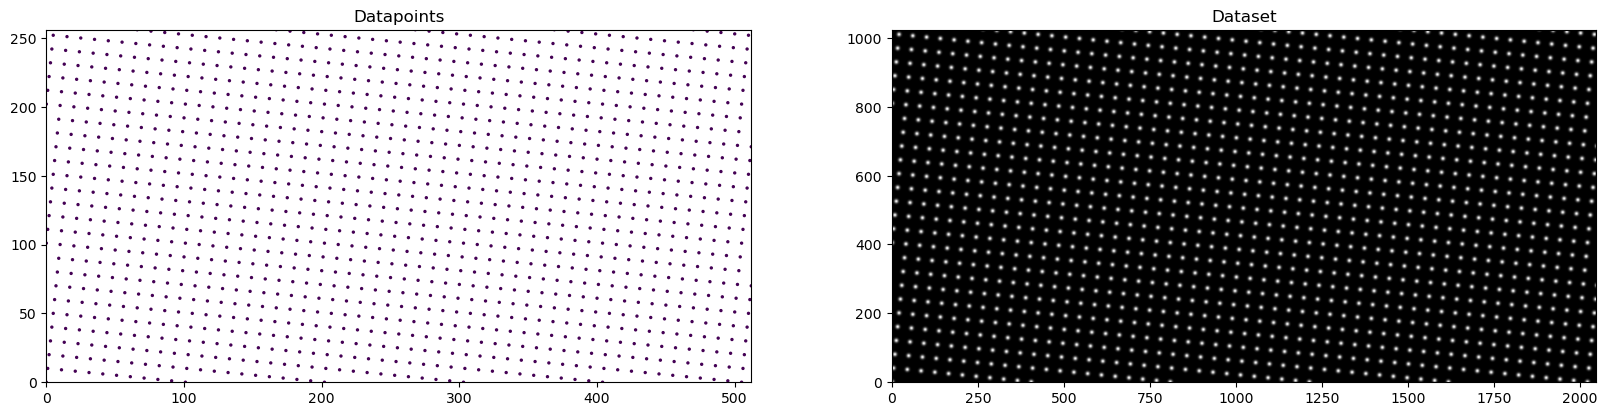

In [7]:
#1 atom primitive cubic
#define basis & primitive
a=[10,-1]                   #a basis vector
b=[1,10]                    #b basis vector
primitive = [0,0,2,1,1,0]   #[a, b, A, s1, s2, theta]

#create dataset
Dataset, XY, _, datapoints = createDataset(bounds=bounds,method='Grid',primitive=primitive,a=a,b=b,normKernel=False)[:4]

#display
fig, ax = plt.subplots(1, 2, figsize=(20,10), dpi = 100)
ax[0].scatter(datapoints[:,0],datapoints[:,1],c=datapoints[:,2],s=2)
ax[0].set_aspect(1)
ax[0].set_xlim([np.min(XY[:,0]),np.max(XY[:,0])])
ax[0].set_ylim([np.min(XY[:,1]),np.max(XY[:,1])])
ax[0].set_title('Datapoints')
ax[1].imshow(Dataset,cmap='gray',origin='lower')
ax[1].set_title('Dataset')

2 atom Hex

Text(0.5, 1.0, 'Dataset')

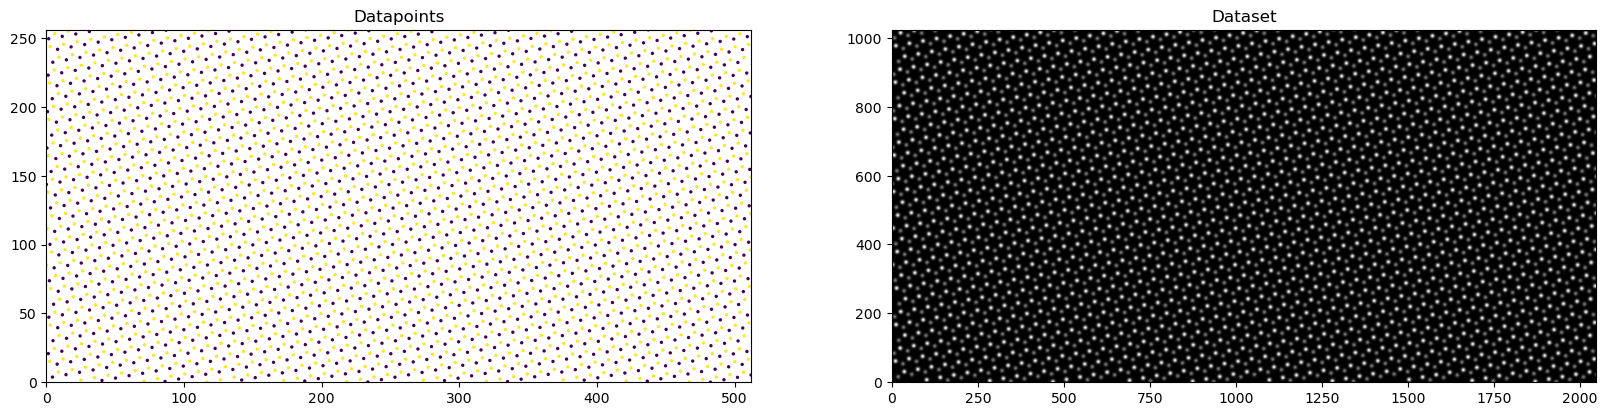

In [8]:
#2 atom primitive hex
#define basis & primitive
mag=10                                                      #basis vector magnitude
alpha = np.deg2rad(60)                                      #internal angle
atheta = np.deg2rad(10)                                     #a vector orientation
a=[np.cos(atheta)*mag, np.sin(atheta)*mag]                  #a basis vector
b=[np.cos(alpha+atheta)*mag, np.sin(alpha+atheta)*mag]      #b basis vector
primitive = [[1/3,1/3,1,1,1,0],[2/3,2/3,2,1,1,0]]           #[a, b, A, s1, s2, theta]

#create dataset
Dataset, XY, _, datapoints = createDataset(bounds=bounds, method='Grid',primitive=primitive,a=a,b=b)[:4]

#display
fig, ax = plt.subplots(1, 2, figsize=(20,10), dpi = 100)
ax[0].scatter(datapoints[:,0],datapoints[:,1],c=datapoints[:,2],s=2)
ax[0].set_aspect(1)
ax[0].set_xlim([np.min(XY[:,0]),np.max(XY[:,0])])
ax[0].set_ylim([np.min(XY[:,1]),np.max(XY[:,1])])
ax[0].set_title('Datapoints')
ax[1].imshow(Dataset,cmap='gray',origin='lower')
ax[1].set_title('Dataset')

Dataset Examples (simple radial, random, no noise)

 57%|█████▋    | 894/1560 [00:01<00:01, 534.65it/s]


Text(0.5, 1.0, 'Dataset')

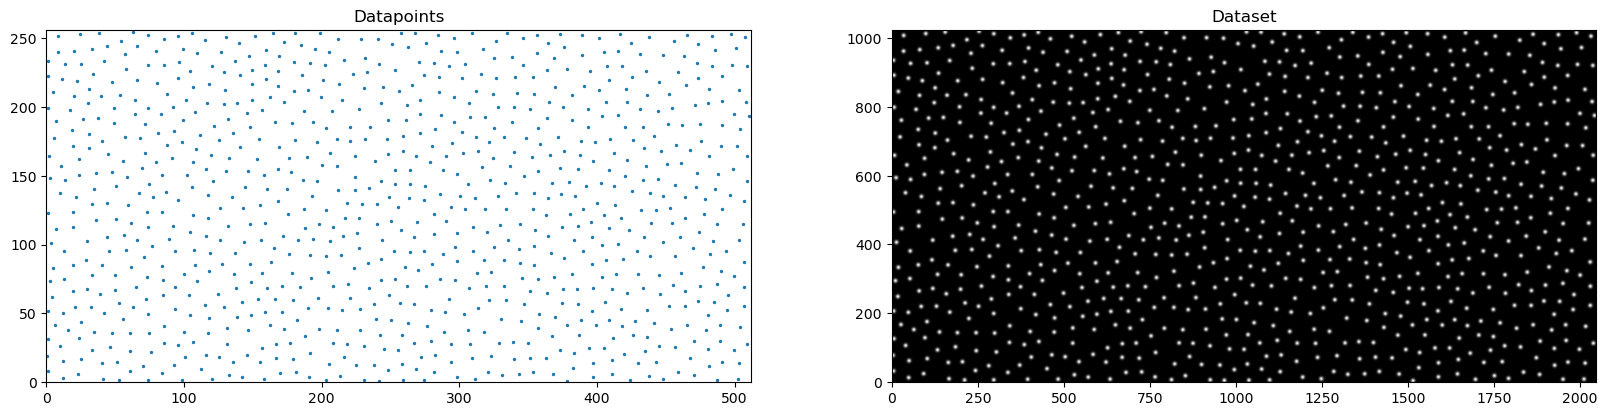

In [9]:
minR = 10
Dataset, XY, _, datapoints = createDataset(bounds=bounds, method='Random',minR=minR)[:4]

#display
fig, ax = plt.subplots(1, 2, figsize=(20,10), dpi = 100)
ax[0].scatter(datapoints[:,0],datapoints[:,1],s=2)
ax[0].set_aspect(1)
ax[0].set_xlim([np.min(XY[:,0]),np.max(XY[:,0])])
ax[0].set_ylim([np.min(XY[:,1]),np.max(XY[:,1])])
ax[0].set_title('Datapoints')
ax[1].imshow(Dataset,cmap='gray',origin='lower')
ax[1].set_title('Dataset')

# Intensity & Area (set using the variable 'normKernel')

Note, when using normKernel=True, discrete sampling of the gaussian kernel will lead to small errors. This is evident in the mismatch in the 2nd example between the image mass vs mass of datapoints.

c:\Programs\Anaconda3\envs\Main\lib\site-packages\numba\cuda\cudadrv\devicearray.py:885: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


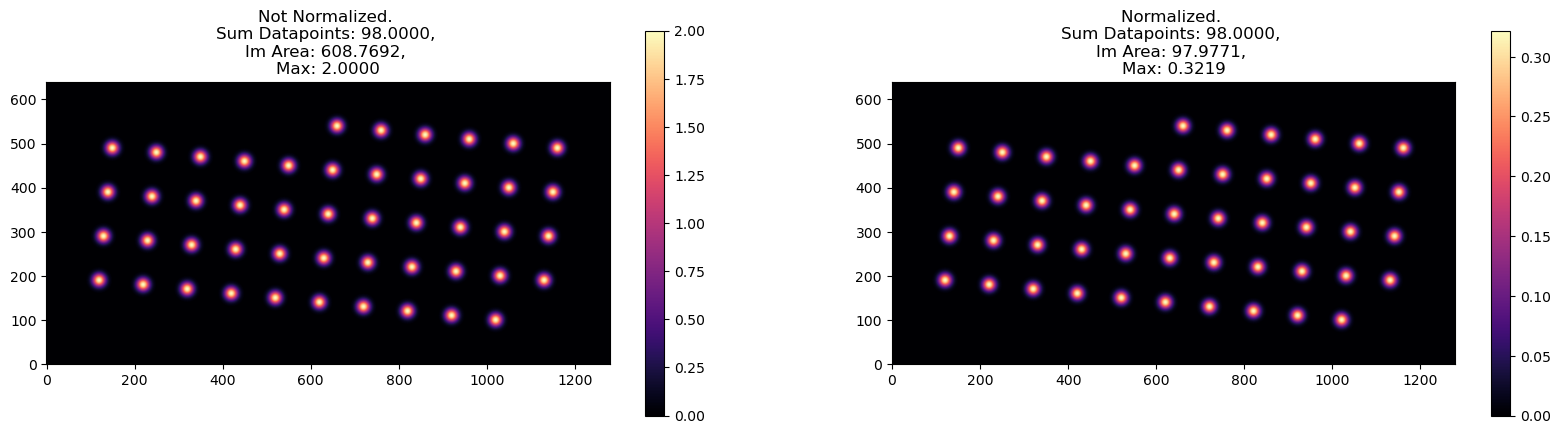

In [10]:
#define basis & primitive
a=[10,-1]                   #a basis vector
b=[1,10]                    #b basis vector
primitive = [0,0,2,1,1,0]   #[a, b, A, s1, s2, theta]

#Define a window and explicitly provide the sampling grid
bounds_small = [0,128,0,64]
edge = 10
stepsize = .1
sampMesh = [bounds_small[0],bounds_small[1],stepsize,bounds_small[2],bounds_small[3],stepsize]

#display
fig, ax = plt.subplots(1, 2, figsize=(20,20/2*bounds_small[3]/bounds_small[1]), dpi = 100)

#Dataset not normalized (default).
normKernel = False
Dataset, XY, _, datapoints = createDataset(bounds=bounds_small,sampMesh=sampMesh,method='Grid',primitive=primitive,edge=edge,a=a,b=b,normKernel=normKernel)[:4]
xx = np.reshape(XY[:,0],Dataset.shape)
yy = np.reshape(XY[:,1],Dataset.shape)
DSArea = np.trapz(np.trapz(Dataset,yy[:,0],axis=0),xx[0,:],axis=0)
h=ax[0].imshow(Dataset,cmap='magma',origin='lower')
ax[0].set_title('Not Normalized. \nSum Datapoints: {:.4f}, \nIm Area: {:.4f}, \nMax: {:.4f}'.format(primitive[2]*datapoints.shape[0], DSArea, np.max(Dataset.ravel())))
fig.colorbar(h, ax=ax[0])

#Dataset normalized
normKernel = True
Dataset, XY, _, datapoints = createDataset(bounds=bounds_small,sampMesh=sampMesh,method='Grid',primitive=primitive,edge=edge,a=a,b=b,normKernel=normKernel)[:4]
xx = np.reshape(XY[:,0],Dataset.shape)
yy = np.reshape(XY[:,1],Dataset.shape)
DSArea = np.trapz(np.trapz(Dataset,yy[:,0],axis=0),xx[0,:],axis=0)
h=ax[1].imshow(Dataset,cmap='magma',origin='lower')
ax[1].set_title('Normalized. \nSum Datapoints: {:.4f}, \nIm Area: {:.4f}, \nMax: {:.4f}'.format(primitive[2]*datapoints.shape[0], DSArea, np.max(Dataset.ravel())))
fig.colorbar(h, ax=ax[1])

# Lattice Position Noise

Noise in Lattice position (normal distr)

Text(0.5, 1.0, 'Applied Position Noise')

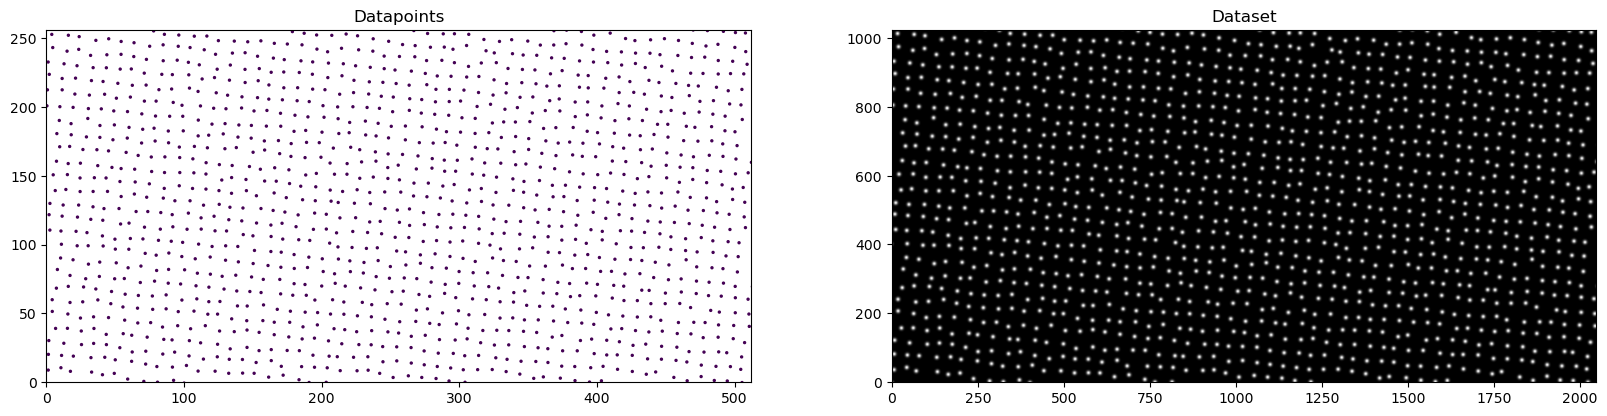

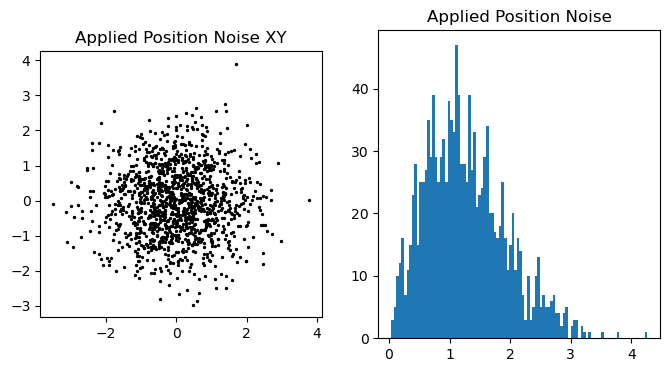

In [11]:
#Position variation (Normal) + 1 atom primitive cubic
pRandRng =  [1.,1.,0,0,0,0]     #parameter noise scalars [x, y, A, s1, s2, theta]
pRandType = [1,1,0,0,0,0]       #noise type 1=Normal, 0=Uniform

#define basis & primitive
a=[10,-1]                   #a basis vector
b=[1,10]                    #b basis vector
primitive = [0,0,2,1,1,0]   #[a, b, A, s1, s2, theta]

#create dataset
Dataset, XY, _, datapoints, _, Noise = createDataset(bounds=bounds, method='Grid',primitive=primitive,a=a,b=b,pRandRng=pRandRng,pRandType=pRandType)[:6]

#display
fig, ax = plt.subplots(1, 2, figsize=(20,10), dpi = 100)
ax[0].scatter(datapoints[:,0],datapoints[:,1],c=datapoints[:,2],s=2)
ax[0].set_aspect(1)
ax[0].set_xlim([np.min(XY[:,0]),np.max(XY[:,0])])
ax[0].set_ylim([np.min(XY[:,1]),np.max(XY[:,1])])
ax[0].set_title('Datapoints')
ax[1].imshow(Dataset,cmap='gray',origin='lower')
ax[1].set_title('Dataset')

#display noise
fig, ax = plt.subplots(1, 2, figsize=(8,4), dpi = 100)
ax[0].scatter(Noise[:,0],Noise[:,1],c='k',s=2)
ax[0].set_aspect(1)
ax[0].set_title('Applied Position Noise XY')
ax[1].hist((Noise[:,0]**2+Noise[:,1]**2)**.5,100)
ax[1].set_title('Applied Position Noise')

Noise in Lattice position (uniform distr)

Text(0.5, 1.0, 'Applied Position Noise')

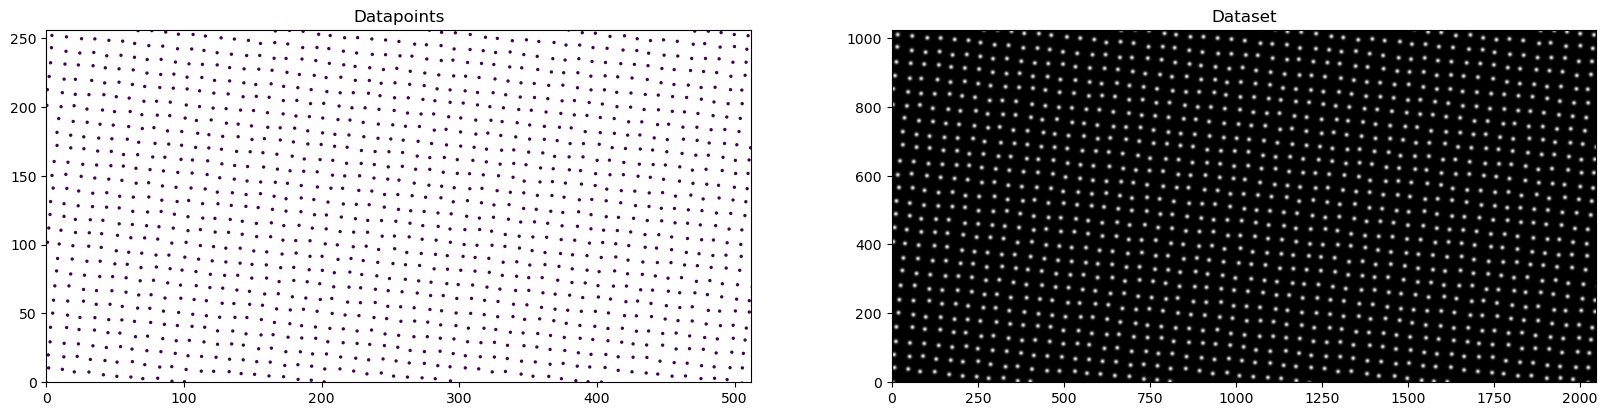

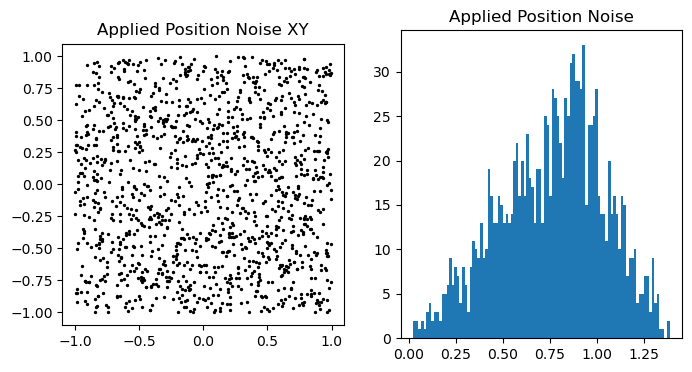

In [12]:
#Position variation (Uniform) + 1 atom primitive cubic
pRandRng =  [2.,2.,0,0,0,0]     #parameter noise scalars [x, y, A, s1, s2, theta]
pRandType = [0,0,0,0,0,0]       #noise type 1=Normal, 0=Uniform

#define basis & primitive
a=[10,-1]                   #a basis vector
b=[1,10]                    #b basis vector
primitive = [0,0,2,1,1,0]   #[a, b, A, s1, s2, theta]

#create dataset
Dataset, XY, _, datapoints, _, Noise = createDataset(bounds=bounds, method='Grid',primitive=primitive,a=a,b=b,pRandRng=pRandRng,pRandType=pRandType)[:6]

#display
fig, ax = plt.subplots(1, 2, figsize=(20,10), dpi = 100)
ax[0].scatter(datapoints[:,0],datapoints[:,1],c=datapoints[:,2],s=2)
ax[0].set_aspect(1)
ax[0].set_xlim([np.min(XY[:,0]),np.max(XY[:,0])])
ax[0].set_ylim([np.min(XY[:,1]),np.max(XY[:,1])])
ax[0].set_title('Datapoints')
ax[1].imshow(Dataset,cmap='gray',origin='lower')
ax[1].set_title('Dataset')

#display noise
fig, ax = plt.subplots(1, 2, figsize=(8,4), dpi = 100)
ax[0].scatter(Noise[:,0],Noise[:,1],c='k',s=2)
ax[0].set_aspect(1)
ax[0].set_title('Applied Position Noise XY')
ax[1].hist((Noise[:,0]**2+Noise[:,1]**2)**.5,100)
ax[1].set_title('Applied Position Noise')

# Scan Position Noise

Normally Distributed

c:\Programs\Anaconda3\envs\Main\lib\site-packages\numba\cuda\cudadrv\devicearray.py:885: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


Text(0.5, 1.0, 'Dataset subset')

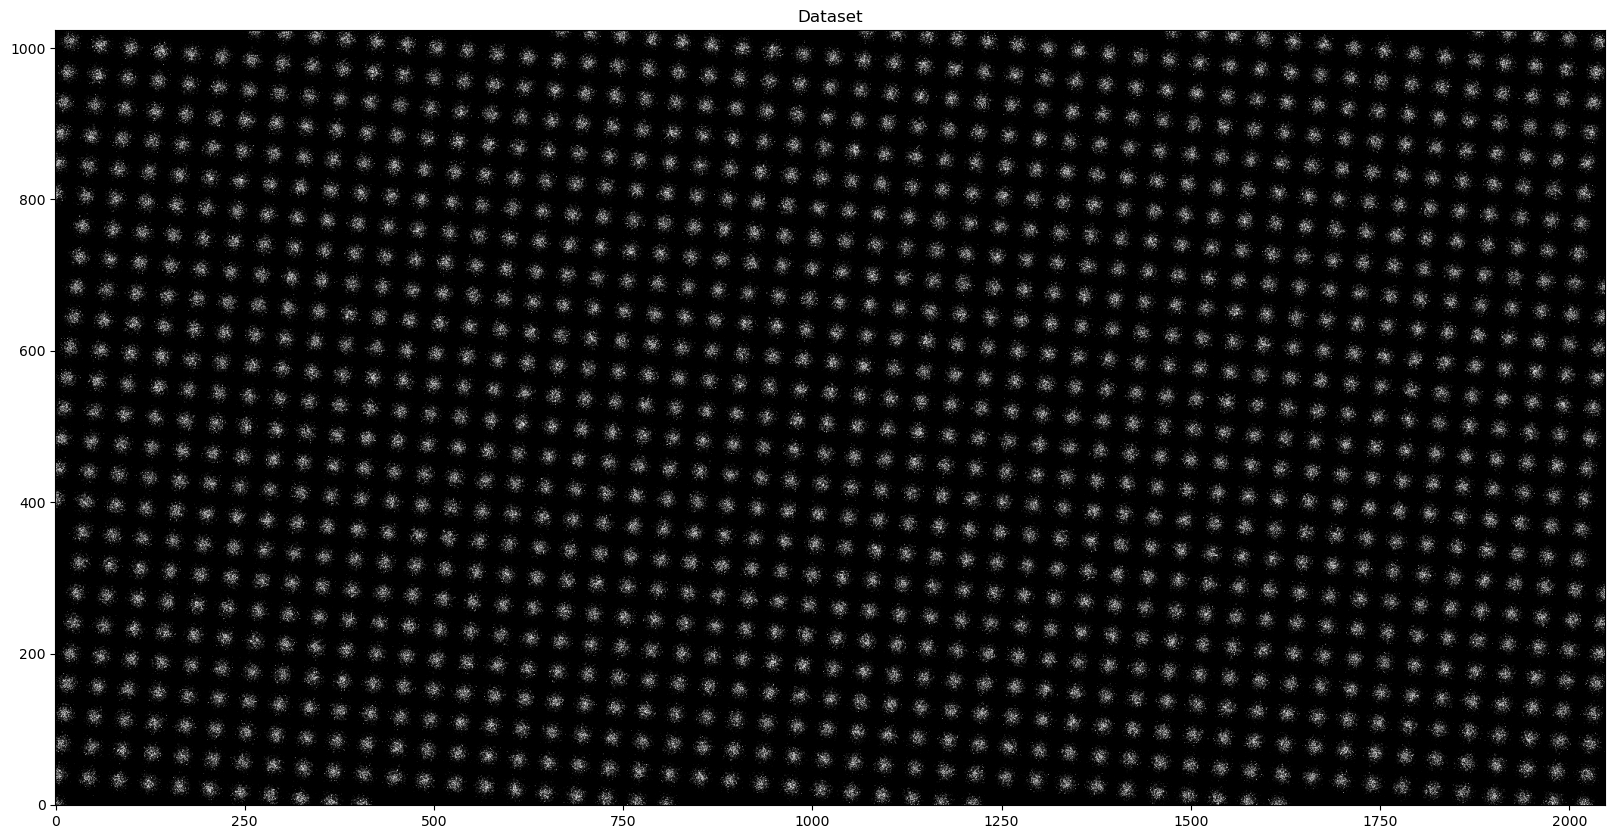

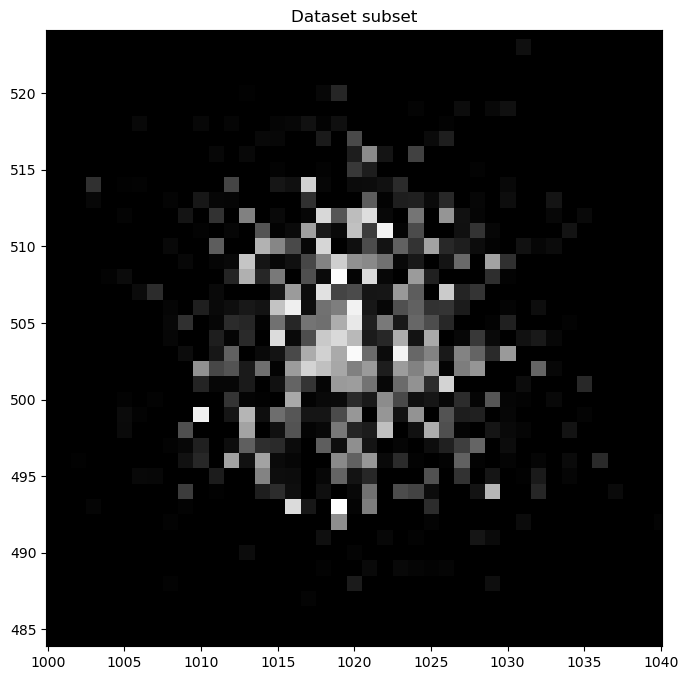

In [14]:
#Scan Position variation (Normal) + 1 atom primitive cubic
sRandRng =  [1.,1.]             #scan position noise scalars [x, y]
sRandType = True       #noise type True=Normal, False=Uniform

#define basis & primitive
a=[10,-1]                   #a basis vector
b=[1,10]                    #b basis vector
primitive = [0,0,2,1,1,0]   #[a, b, A, s1, s2, theta]

#create dataset
Dataset, XY, _, datapoints, _, Noise, mgparams,_ = createDataset(bounds=bounds, method='Grid',primitive=primitive,a=a,b=b,sRandRng=sRandRng,sRandType=sRandType)

#display
fig, ax = plt.subplots(1, 1, figsize=(20,20), dpi = 100)
ax.imshow(Dataset,cmap='gray',origin='lower')
ax.set_title('Dataset')

#display zoomed in
#get datapoint closest to center
sz = [Dataset.shape[1]*mgparams[2],Dataset.shape[0]*mgparams[5]]
r = ((datapoints[:,0]-sz[0]/2)**2 + (datapoints[:,1]-sz[1]/2)**2)**.5
ind = np.argmin(r)
amag = (a[0]**2+a[1]**2)**.5
fig, ax = plt.subplots(1, 1, figsize=(8,8), dpi = 100)
ax.imshow(Dataset,cmap='gray',origin='lower')
ax.set_xlim([datapoints[ind,0]/mgparams[2]-amag/2/mgparams[2],datapoints[ind,0]/mgparams[2]+amag/2/mgparams[2]])
ax.set_ylim([datapoints[ind,1]/mgparams[5]-amag/2/mgparams[5],datapoints[ind,1]/mgparams[5]+amag/2/mgparams[5]])
ax.set_title('Dataset subset')

# Gaussian kernel parameter noise

Text(0.5, 1.0, 'Noise: Rotation (deg)')

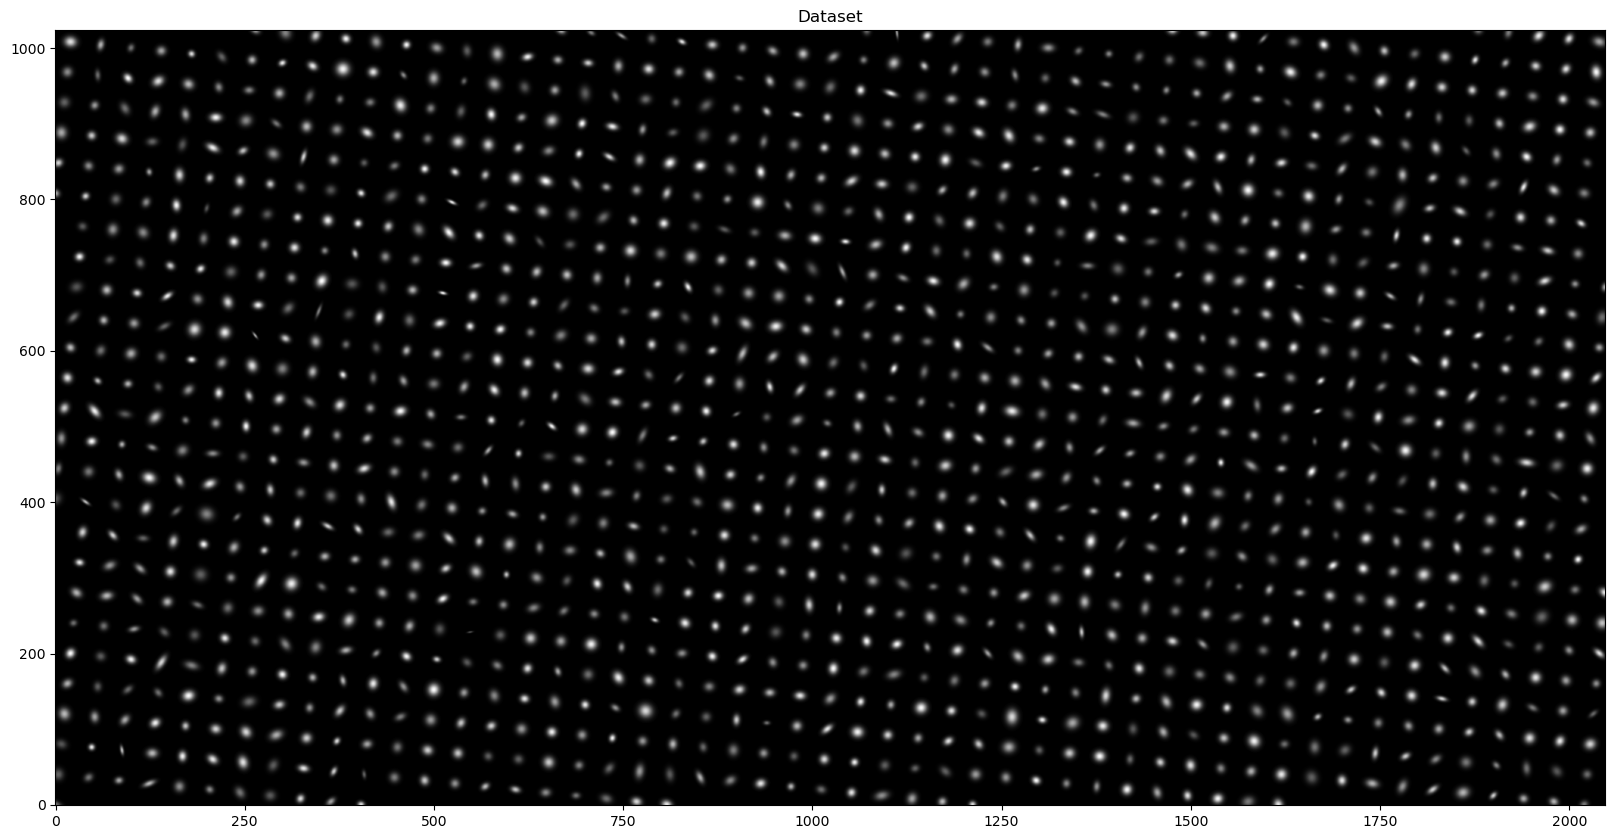

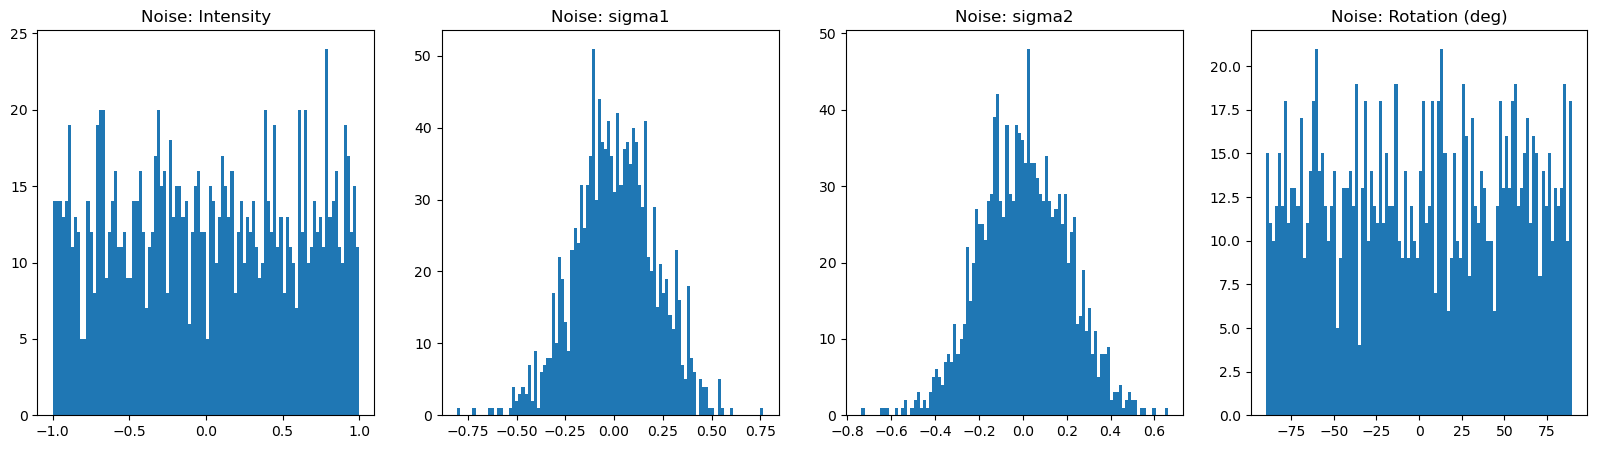

In [17]:
#Position variation (Normal) + 1 atom primitive cubic
pRandRng =  [0.,0.,2,.2,.2,np.pi]    #parameter noise scalars [x, y, A, s1, s2, theta]
pRandType = [1,1,0,1,1,0]               #noise type 1=Normal, 0=Uniform

#define basis & primitive
a=[10,-1]                   #a basis vector
b=[1,10]                    #b basis vector
primitive = [0,0,2,1,1,0]   #[a, b, A, s1, s2, theta]

#create dataset
Dataset, XY, _, datapoints, _, Noise = createDataset(bounds=bounds, method='Grid',primitive=primitive,a=a,b=b,pRandRng=pRandRng,pRandType=pRandType)[:6]

#display
fig, ax = plt.subplots(1, 1, figsize=(20,20), dpi = 100)
ax.imshow(Dataset,cmap='gray',origin='lower')
ax.set_title('Dataset')

#display noise
fig, ax = plt.subplots(1, 4, figsize=(20,5), dpi = 100)
ax[0].hist(Noise[:,2],100)
ax[0].set_title('Noise: Intensity')
ax[1].hist(Noise[:,3],100)
ax[1].set_title('Noise: sigma1')
ax[2].hist(Noise[:,4],100)
ax[2].set_title('Noise: sigma2')
ax[3].hist(np.rad2deg(Noise[:,5]),100)
ax[3].set_title('Noise: Rotation (deg)')

# Intensity Noise (Shot & Background)

Shot Noise

c:\Programs\Anaconda3\envs\Main\lib\site-packages\numba\cuda\cudadrv\devicearray.py:885: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


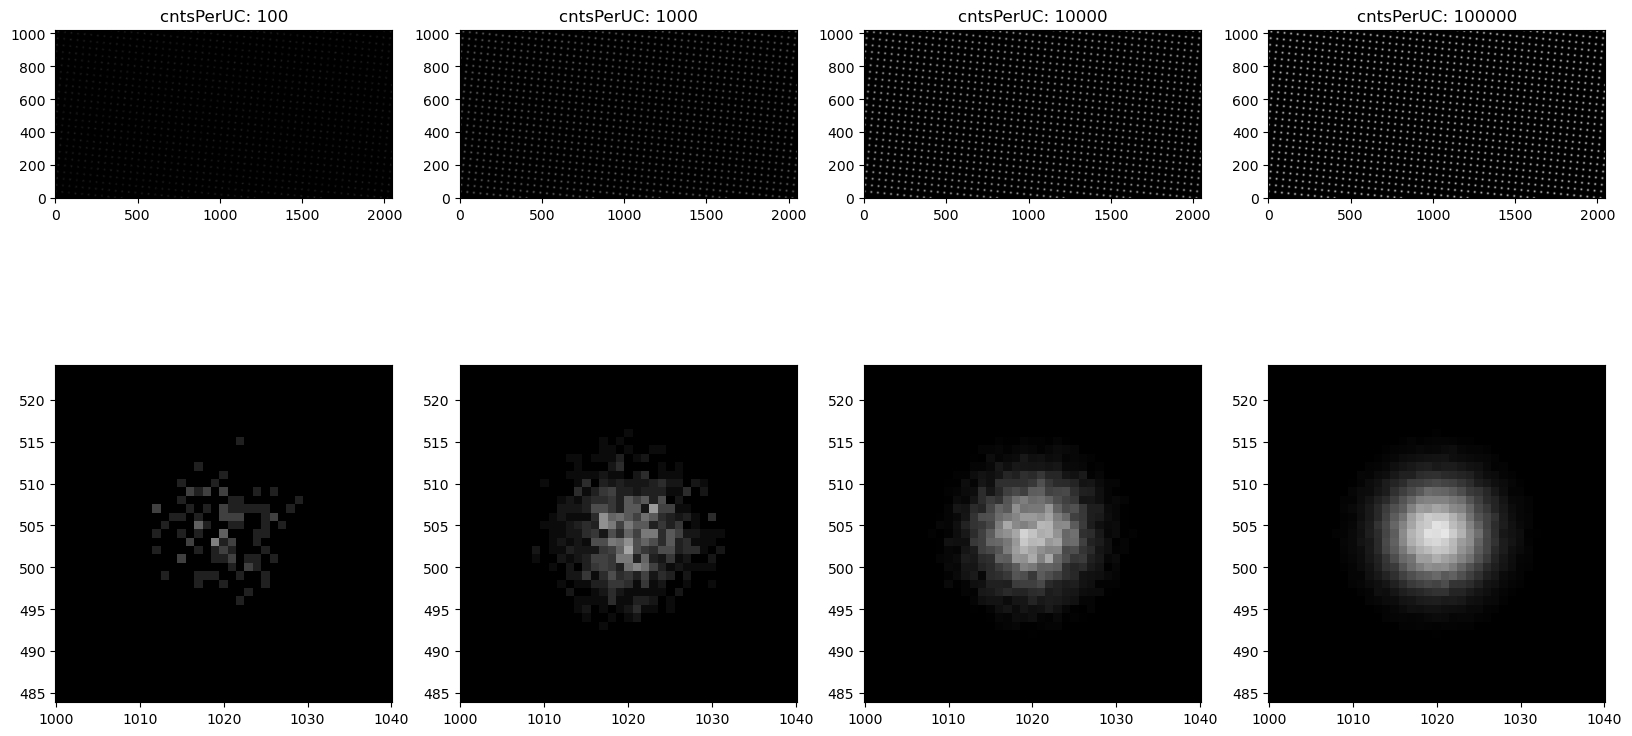

In [19]:
#Shot noise. For a lattice the counts are given per basis primitive.
countsPerPrimitive = np.array([100, 1000, 10000, 100000])    # counts

#define basis & primitive
a=[10,-1]                   #a basis vector
b=[1,10]                    #b basis vector
primitive = [0,0,2,1,1,0]   #[a, b, A, s1, s2, theta]
amag = (a[0]**2+a[1]**2)**.5

n = countsPerPrimitive.size
#display
fig, ax = plt.subplots(2, n, figsize=(20,np.ceil(20*2/n).astype('int')), dpi = 100)

for i in range(n):
    #create dataset
    Dataset, XY, _, datapoints, _, Noise, mgparams, _ = createDataset(bounds=bounds, method='Grid',primitive=primitive,a=a,b=b,countsPerUnit=countsPerPrimitive[i])
    if i==0:
        sz = [Dataset.shape[1]*mgparams[2],Dataset.shape[0]*mgparams[5]]
        r = ((datapoints[:,0]-sz[0]/2)**2 + (datapoints[:,1]-sz[1]/2)**2)**.5
        ind = np.argmin(r)
        
    #plot full
    ax[0,i].imshow(Dataset,cmap='gray',origin='lower')
    ax[0,i].set_title('cntsPerUC: {:d}'.format(countsPerPrimitive[i]))
    #plot subset
    ax[1,i].imshow(Dataset,cmap='gray',origin='lower')
    ax[1,i].set_xlim([datapoints[ind,0]/mgparams[2]-amag/2/mgparams[2],datapoints[ind,0]/mgparams[2]+amag/2/mgparams[2]])
    ax[1,i].set_ylim([datapoints[ind,1]/mgparams[5]-amag/2/mgparams[5],datapoints[ind,1]/mgparams[5]+amag/2/mgparams[5]])

Base Gaussian Noise

c:\Programs\Anaconda3\envs\Main\lib\site-packages\numba\cuda\cudadrv\devicearray.py:885: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


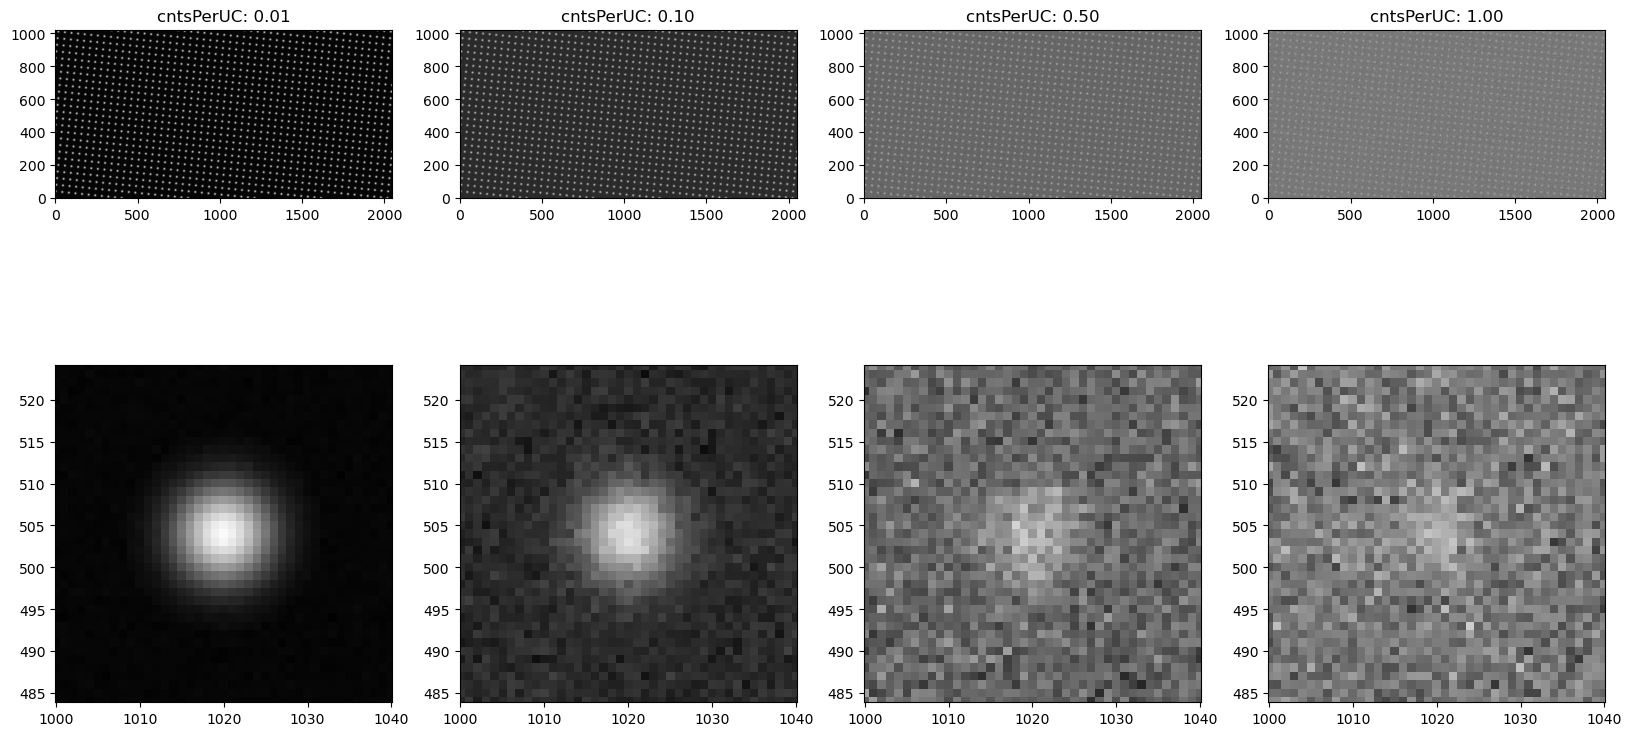

In [20]:
#Shot noise. For a lattice the counts are given per basis primitive.
baseNoiseRng = np.array([.01, .1, .5, 1])    # additive gaussian noise

#define basis & primitive
a=[10,-1]                   #a basis vector
b=[1,10]                    #b basis vector
primitive = [0,0,2,1,1,0]   #[a, b, A, s1, s2, theta]
amag = (a[0]**2+a[1]**2)**.5

n = baseNoiseRng.size
#display
fig, ax = plt.subplots(2, n, figsize=(20,np.ceil(20*2/n).astype('int')), dpi = 100)

for i in range(n):
    #create dataset
    Dataset, XY, _, datapoints, _, Noise, mgparams, _ = createDataset(bounds=bounds, method='Grid',primitive=primitive,a=a,b=b,baseNoiseRng=baseNoiseRng[i])
    if i==0:
        sz = [Dataset.shape[1]*mgparams[2],Dataset.shape[0]*mgparams[5]]
        r = ((datapoints[:,0]-sz[0]/2)**2 + (datapoints[:,1]-sz[1]/2)**2)**.5
        ind = np.argmin(r)
        
    #plot full
    ax[0,i].imshow(Dataset,cmap='gray',origin='lower')
    ax[0,i].set_title('cntsPerUC: {:.2f}'.format(baseNoiseRng[i]))
    #plot subset
    ax[1,i].imshow(Dataset,cmap='gray',origin='lower')
    ax[1,i].set_xlim([datapoints[ind,0]/mgparams[2]-amag/2/mgparams[2],datapoints[ind,0]/mgparams[2]+amag/2/mgparams[2]])
    ax[1,i].set_ylim([datapoints[ind,1]/mgparams[5]-amag/2/mgparams[5],datapoints[ind,1]/mgparams[5]+amag/2/mgparams[5]])

# Custom Scans

sinusoidal noise in raster scan

c:\Programs\Anaconda3\envs\Main\lib\site-packages\numba\cuda\cudadrv\devicearray.py:885: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


Text(0.5, 1.0, 'Dataset subset')

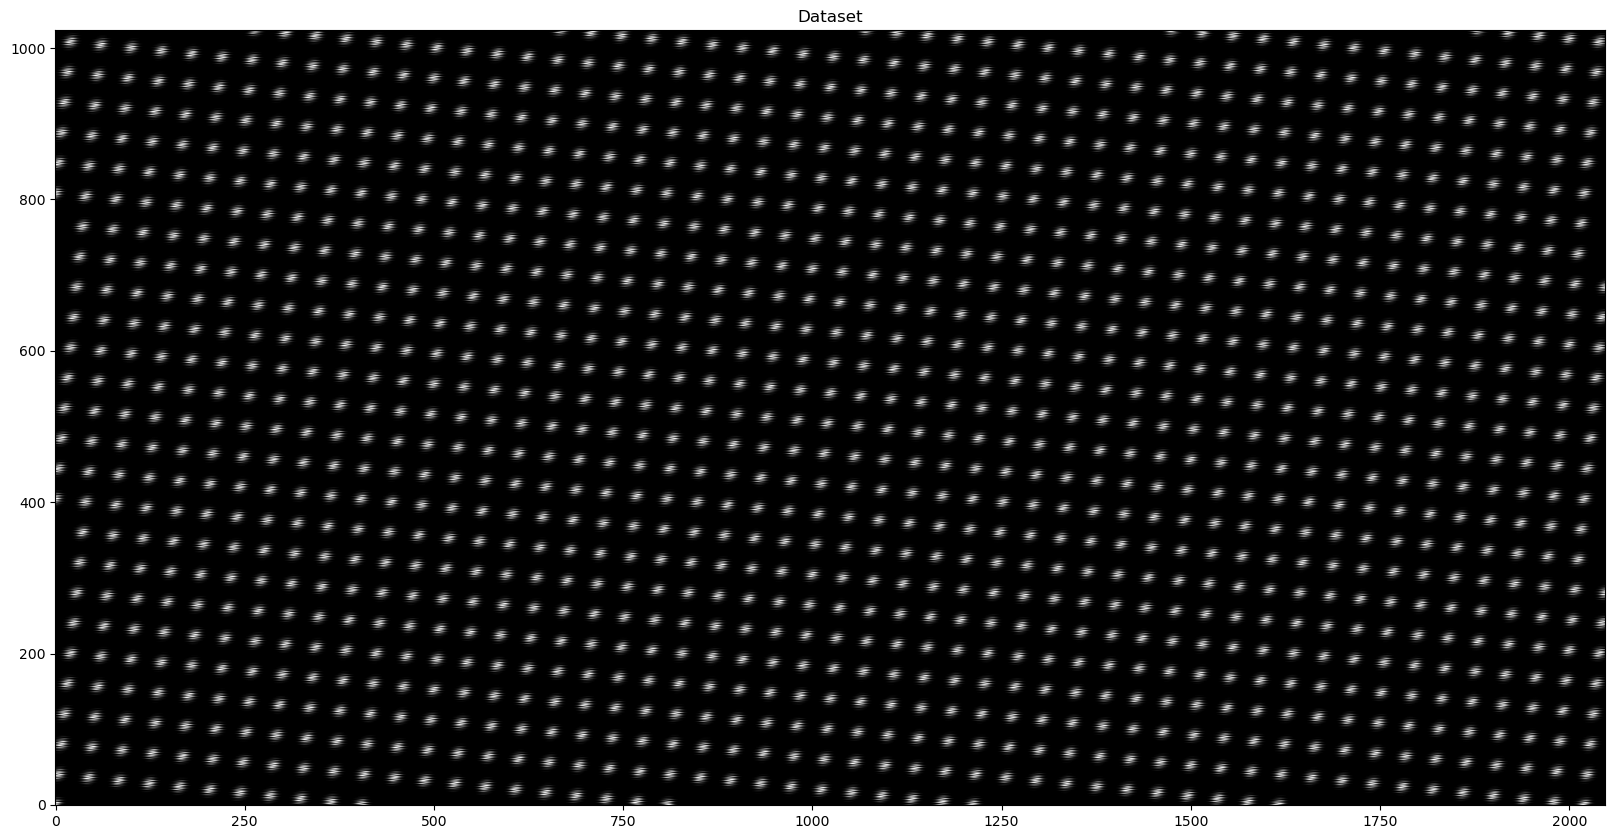

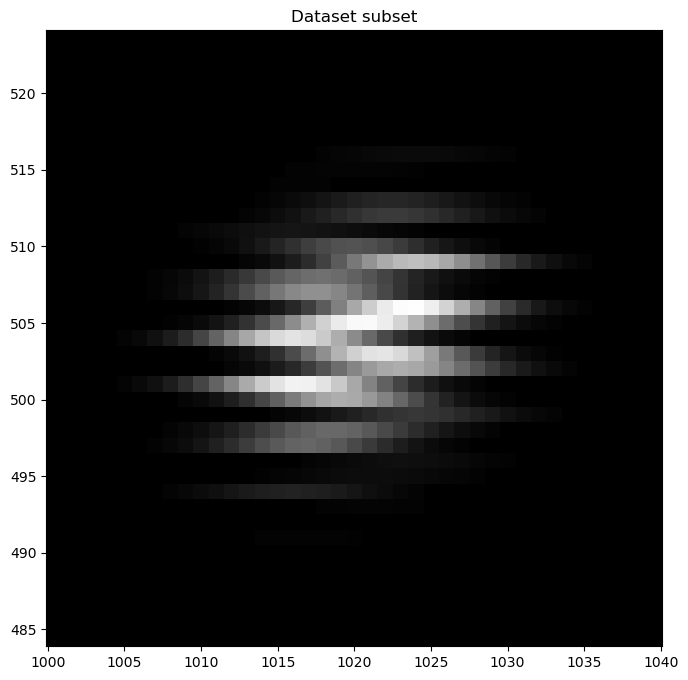

In [21]:
#example: add a sinusoidal noise offset to a raster scan
v = np.array([1.,.5])   #offset vector
f = 500                 #sinusoidal period
flybackwait = 100       #add this wait at start of each line

#create meshgrid + sinusoidal offset vector
meshstep=.25
sampMesh = [bounds[0],bounds[1],meshstep,bounds[2],bounds[3],meshstep]
xx,yy = np.meshgrid(np.arange(sampMesh[0],sampMesh[1],sampMesh[2]),np.arange(sampMesh[3],sampMesh[4],sampMesh[5]))
t = np.reshape(np.arange(xx.size),xx.shape)
t = t+ yy/meshstep*flybackwait
phase = t/f*np.pi*2
sX = xx+np.sin(phase)*v[0]
sY = yy+np.sin(phase)*v[1]
samplingXY = np.vstack((sX.ravel(),sY.ravel())).T

#define basis & primitive
a=[10,-1]                   #a basis vector
b=[1,10]                    #b basis vector
primitive = [0,0,2,1,1,0]   #[a, b, A, s1, s2, theta]

#create dataset
Dataset, XY, _, datapoints, _, Noise, mgparams, _ = createDataset(bounds=bounds, method='Grid',primitive=primitive,a=a,b=b,samplingXY=samplingXY,sampMesh=sampMesh)

#display
fig, ax = plt.subplots(1, 1, figsize=(20,20), dpi = 100)
ax.imshow(Dataset,cmap='gray',origin='lower')
ax.set_title('Dataset')

#display zoomed in
#get datapoint closest to center
sz = [Dataset.shape[1]*mgparams[2],Dataset.shape[0]*mgparams[5]]
r = ((datapoints[:,0]-sz[0]/2)**2 + (datapoints[:,1]-sz[1]/2)**2)**.5
ind = np.argmin(r)
amag = (a[0]**2+a[1]**2)**.5
fig, ax = plt.subplots(1, 1, figsize=(8,8), dpi = 100)
ax.imshow(Dataset,cmap='gray',origin='lower')
ax.set_xlim([datapoints[ind,0]/mgparams[2]-amag/2/mgparams[2],datapoints[ind,0]/mgparams[2]+amag/2/mgparams[2]])
ax.set_ylim([datapoints[ind,1]/mgparams[5]-amag/2/mgparams[5],datapoints[ind,1]/mgparams[5]+amag/2/mgparams[5]])
ax.set_title('Dataset subset')

Lissajous Custom Scan

c:\Programs\Anaconda3\envs\Main\lib\site-packages\numba\cuda\cudadrv\devicearray.py:885: NumbaPerformanceWarning: Host array used in CUDA kernel will incur copy overhead to/from device.
  warn(NumbaPerformanceWarning(msg))


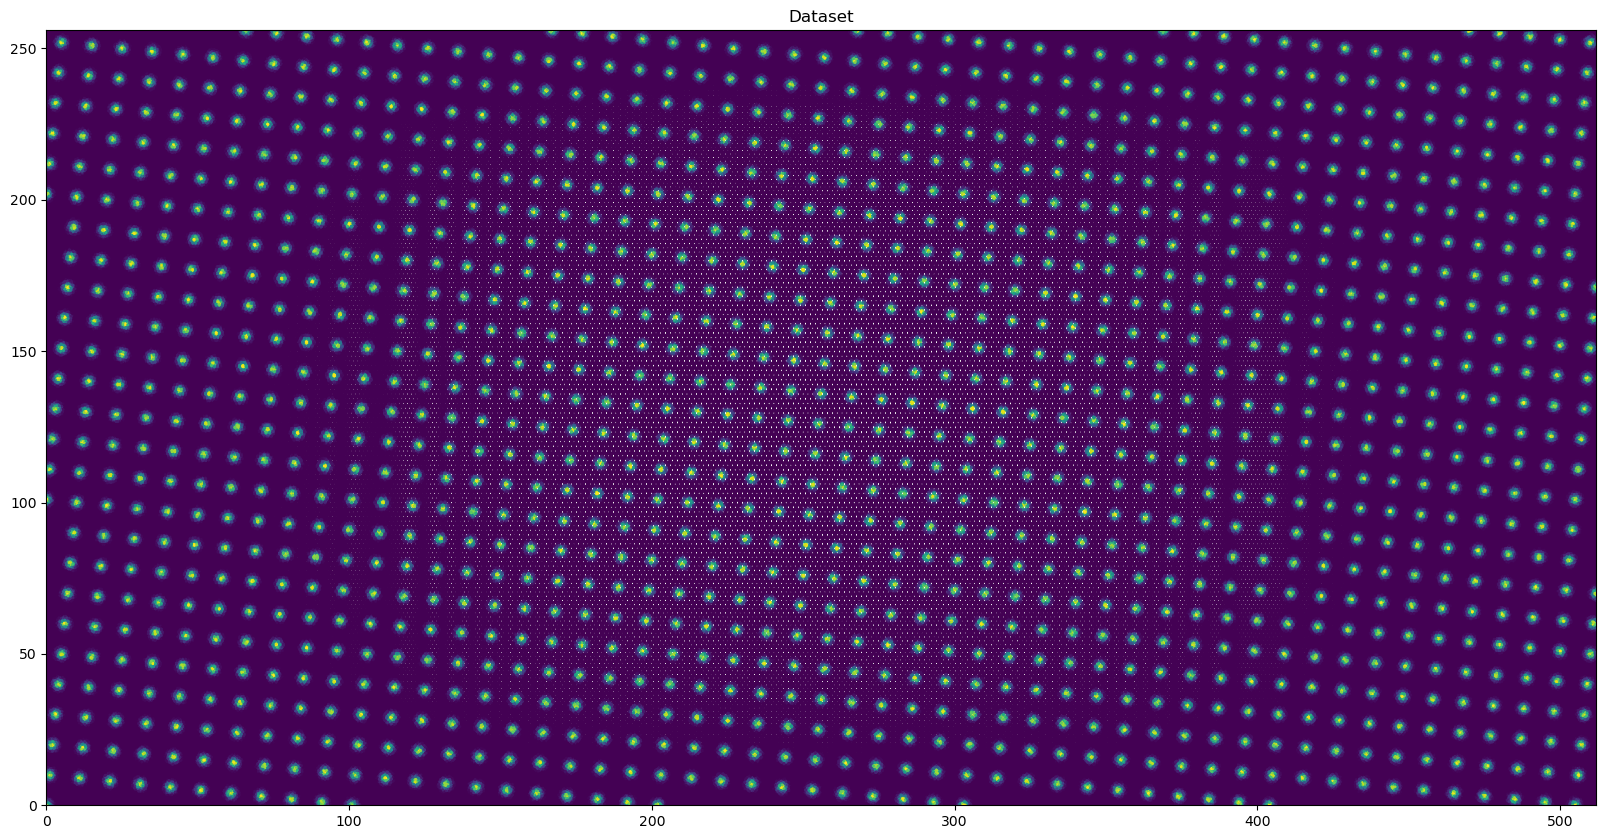

In [22]:
rho = np.pi/2
xa = 1000
ya = 1001
xA = (bounds[1]-bounds[0])/2
yA = (bounds[3]-bounds[2])/2
t = np.arange(0,xa*ya,.25)
sX = xA*np.sin(xA*t+rho)  +(bounds[0]+bounds[1])/2
sY = yA*np.sin(ya*t)      +(bounds[2]+bounds[3])/2
samplingXY = np.vstack((sX.ravel(),sY.ravel())).T

#define basis & primitive
a=[10,-1]                   #a basis vector
b=[1,10]                    #b basis vector
primitive = [0,0,2,1,1,0]   #[a, b, A, s1, s2, theta]

#create dataset
Dataset, XY, _, datapoints, _, Noise, mgparams, _ = createDataset(bounds=bounds, method='Grid',primitive=primitive,a=a,b=b,samplingXY=samplingXY)

#display
fig, ax = plt.subplots(1, 1, figsize=(20,20), dpi = 100)
ax.scatter(samplingXY[:,0],samplingXY[:,1],c=Dataset,s=1)
ax.set_title('Dataset')
ax.set_xlim([bounds[0],bounds[1]])
ax.set_ylim([bounds[2],bounds[3]])
ax.set_aspect(1)